## K-Means Clustering 


## Goal:

When working with unsupervised learning methods, its usually important to lay out a general goal. In our case, let's attempt to find reasonable clusters of customers for marketing segmentation and study. What we end up doing with those clusters would depend **heavily** on the domain itself, in this case, marketing.

## The Data

LINK: https://archive.ics.uci.edu/ml/datasets/bank+marketing

   This dataset is public available for research. The details are described in [Moro et al., 2011]. 


      [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
      In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

      Available at: [pdf] http://hdl.handle.net/1822/14838
                    [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt
     For more information, read [Moro et al., 2011].

    # bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

### Step1: Import all Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step2: Import the Dataset

In [2]:
df= pd.read_csv('bank-full.csv')

### Step3: Data Overview


In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
subscribed        41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### Step4: Exploratory Data Analysis


In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age')

AttributeError: module 'seaborn' has no attribute 'histplot'

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='age', ylabel='Count'>

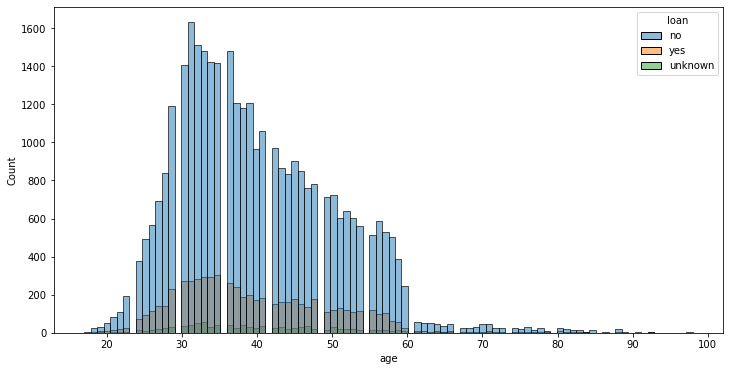

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='loan')

<AxesSubplot:xlabel='pdays', ylabel='Count'>

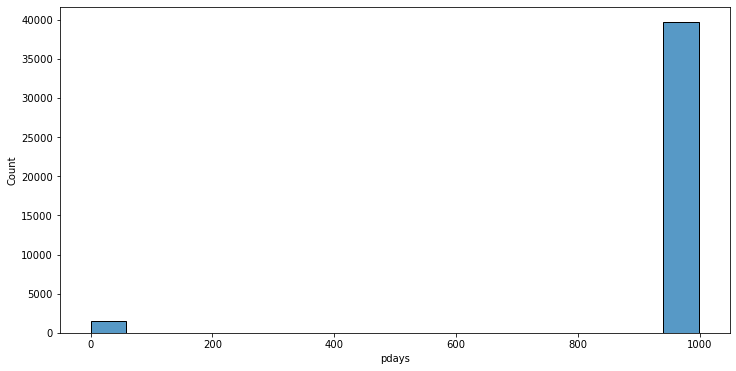

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='pdays')

<AxesSubplot:xlabel='pdays', ylabel='Count'>

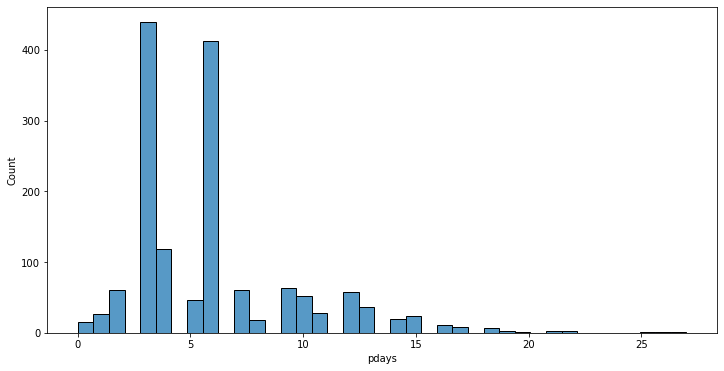

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['pdays']!=999], x='pdays')

<AxesSubplot:xlabel='duration', ylabel='Count'>

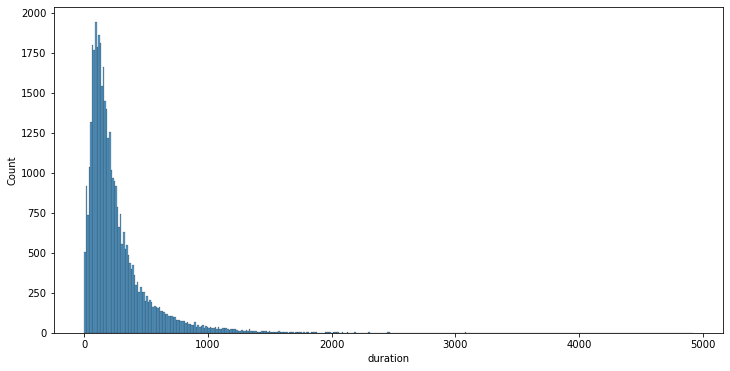

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='duration')

(0.0, 2000.0)

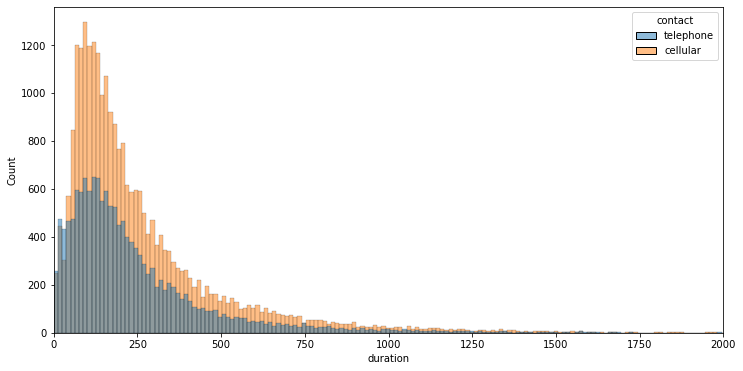

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='duration', hue='contact')
plt.xlim(0,2000)

<AxesSubplot:xlabel='contact', ylabel='count'>

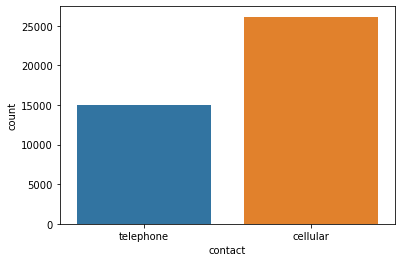

In [19]:
sns.countplot(data=df, x='contact')

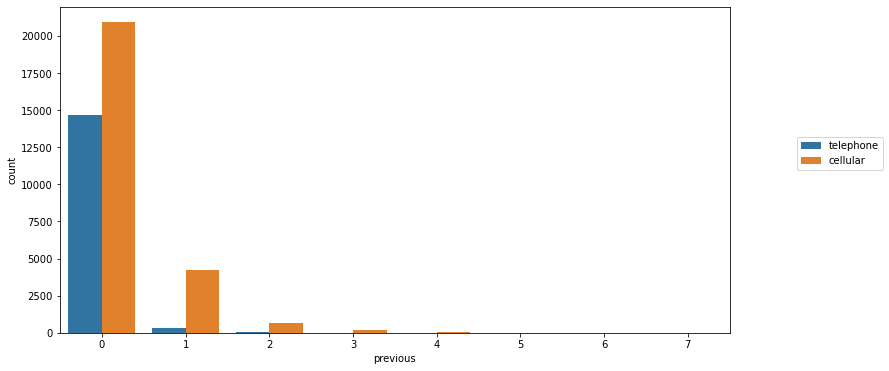

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='previous', hue='contact' )
plt.legend(loc=(1.1, 0.5))

In [24]:
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

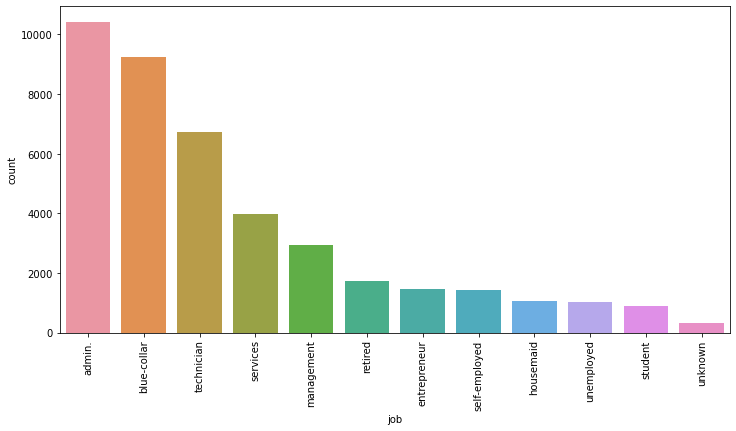

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.xticks(rotation=90);

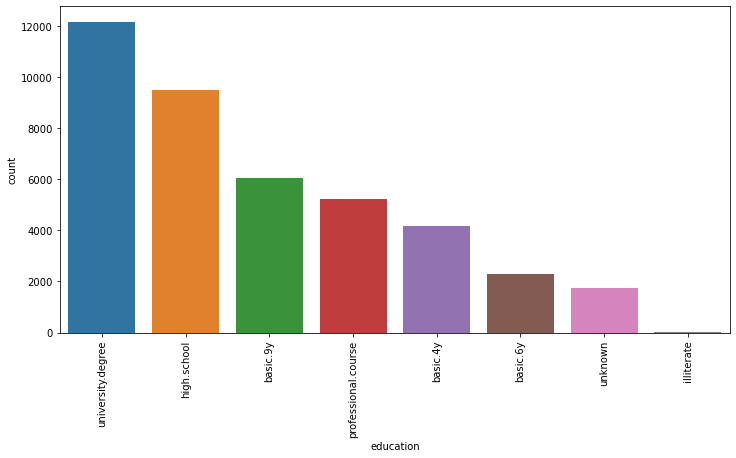

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.xticks(rotation=90);

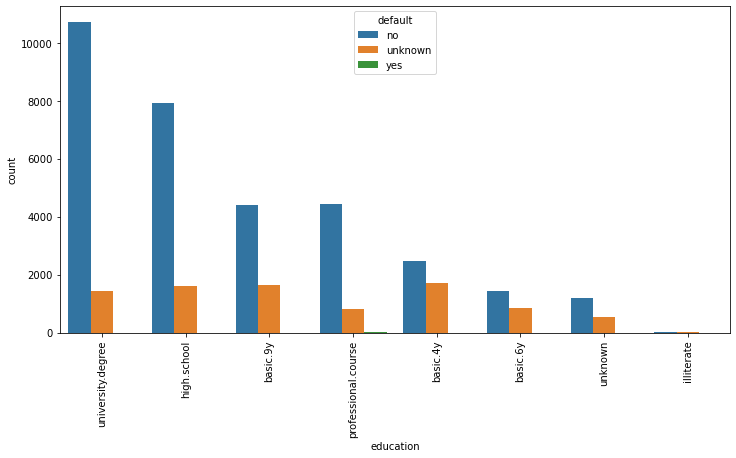

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, hue='default')
plt.xticks(rotation=90);

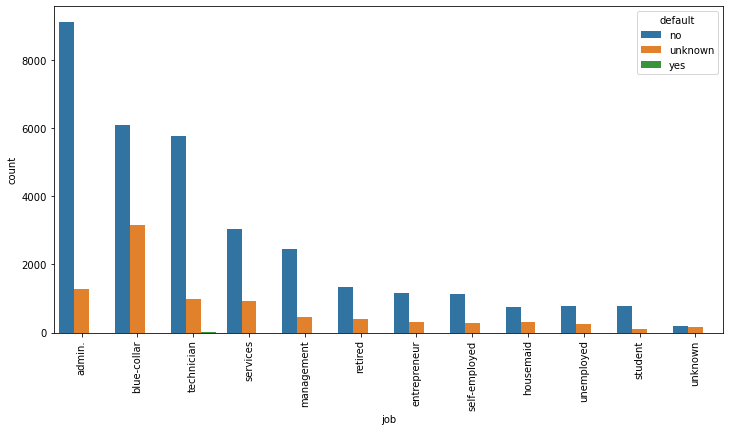

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index, hue='default')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='default', ylabel='count'>

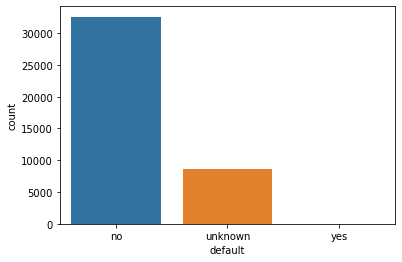

In [34]:
sns.countplot(data=df, x='default')

## Step5: Data Preparing

In [35]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [36]:
X= pd.get_dummies(df)

In [37]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


## Step6: Scaling the Featues

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler= StandardScaler()

In [42]:
scaled_X= scaler.fit_transform(X)

In [43]:
scaled_X

array([[ 1.53303429,  0.01047142, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 1.62899323, -0.42150051, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [-0.29018564, -0.12451981, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 0.38152696,  0.70856893, -0.56592197, ..., -0.1857    ,
        -2.80655022,  2.80655022],
       [ 3.26029527, -0.07438021,  0.15610492, ..., -0.1857    ,
         0.35630932, -0.35630932]])

## Step7: Creating and Fitting a KMeans Model

In [44]:
from sklearn.cluster import KMeans

In [45]:
model = KMeans(n_clusters=2)

In [52]:
cluster_labels= model.fit_predict(scaled_X)

In [53]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0])

In [54]:
len(scaled_X)

41188

In [55]:
len(cluster_labels)

41188

In [56]:
X['Cluster']=cluster_labels

<AxesSubplot:>

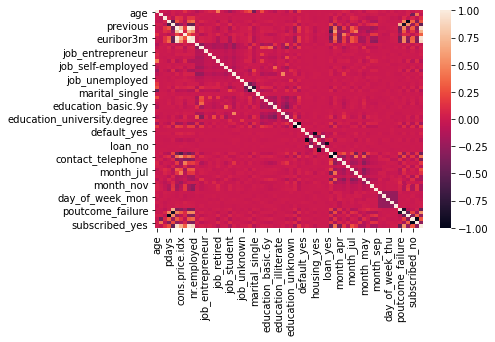

In [57]:
sns.heatmap(X.corr())

In [59]:
X.corr()['Cluster'].sort_values()

previous           -0.478467
poutcome_failure   -0.464295
contact_cellular   -0.410476
month_apr          -0.357923
subscribed_yes     -0.294610
                      ...   
cons.price.idx      0.679372
nr.employed         0.886155
emp.var.rate        0.932612
euribor3m           0.959297
Cluster             1.000000
Name: Cluster, Length: 66, dtype: float64

<AxesSubplot:>

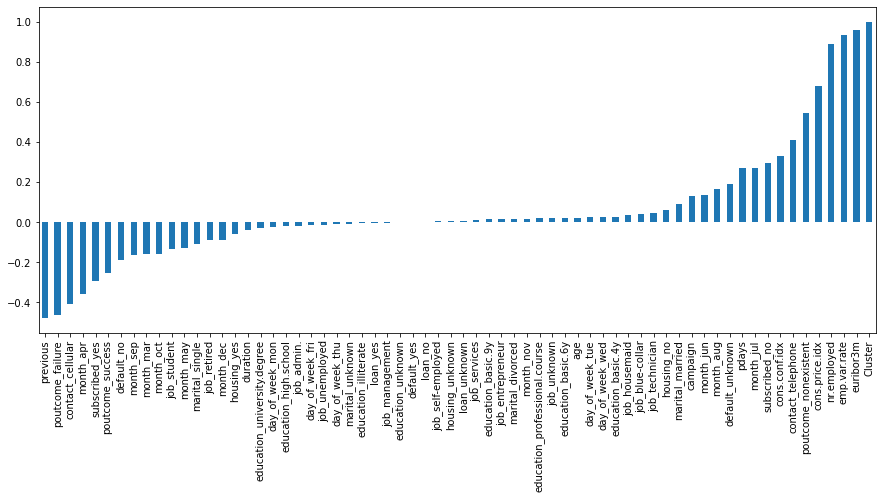

In [62]:
plt.figure(figsize=(15,6))
X.corr()['Cluster'].sort_values().plot(kind='bar')

## Choosing K Value

In [71]:
ssd= []

for k in range (2, 10):
    model=KMeans(n_clusters=k)
    
    model.fit(scaled_X)
    
    ssd.append(model.inertia_)

In [72]:
ssd

[2469792.361662774,
 2370787.190992799,
 2271503.4825083134,
 2234776.3494189656,
 2149930.020191333,
 2120084.7871647254,
 2056298.8426698514,
 2004455.4550735245]

Text(0, 0.5, 'Sum of Squared Distances')

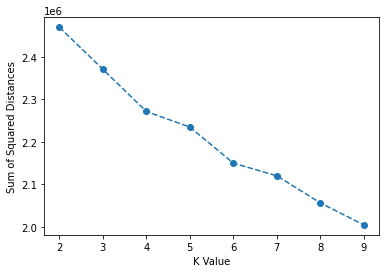

In [73]:
plt.plot(range(2,10), ssd, 'o--')
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Distances')

In [74]:
pd.Series(ssd).diff()

0             NaN
1   -99005.170670
2   -99283.708484
3   -36727.133089
4   -84846.329228
5   -29845.233027
6   -63785.944495
7   -51843.387596
dtype: float64

<AxesSubplot:>

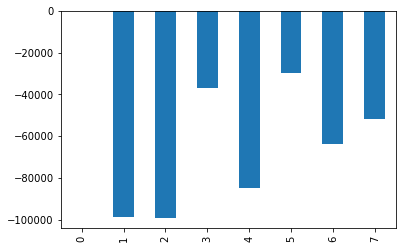

In [75]:
pd.Series(ssd).diff().plot(kind='bar')